<a href="https://colab.research.google.com/github/andrewlee-29/Applied_Deep_Learning_2023Summer/blob/main/Week10_(CNN_segmetation)_chapter09_part01_image_segmentation_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Advanced deep learning for computer vision

## An image segmentation example

### Definition
> assign a class to each pixel in an image, thus segmenting the image into different zones

Examples:

> “background” and “foreground,” or “road,” “car,” and “sidewalk”

## 2 kinds of segmentation

### 1 Semantic segmentation

> each pixel is independently classified into a semantic category, like “cat.”
> If there are two cats in the image, the corresponding pixels are all mapped to the same generic “cat” category.

### 2 Instance segmentation
> Seeks not only to classify image pixels by category, but also to parse out individual object instances.
> In an image with two cats in it, instance segmentation would treat “cat 1” and “cat 2” as two separate classes of pixels

We will look at #1, semantic.

### Data
Oxford IIIT Pets dataset: http://www.robots.ox.ac.uk/~vgg/data/pets/

### Setup

How can we use a classifaction model for this task??


In [ ]:
#Download data
#Over 1 GB

d = False #Already downloaded?

if not d:
    !wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
    !wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
    !tar -xf images.tar.gz
    !tar -xf annotations.tar.gz

--2023-07-23 14:34:02--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2023-07-23 14:34:03--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-07-23 14:34:03--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Perman

In [ ]:
import os

#~5k Dog + ~2.4k Cat Breeds
input_dir = "images/"
target_dir = "annotations/trimaps/"

#pet images
input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])

#segmentation maps
target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])

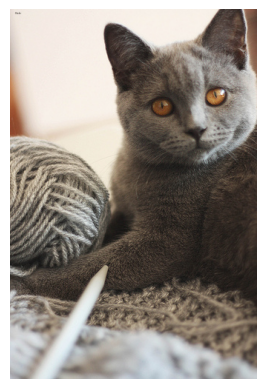

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
i = 888 #9
plt.imshow(load_img(input_img_paths[i]))

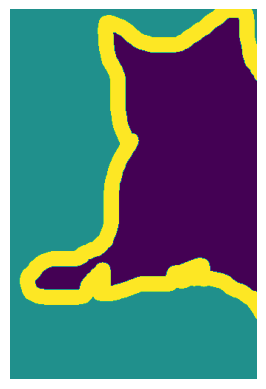

In [ ]:
def display_target(target_array):
    #labels are 1,2,3. Subtract 1 to make range from 0,1,2
    #multiply by 127 so that the labels become 0 (black), 127 (gray), 254 (near-white)
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

img = img_to_array(load_img(target_paths[i], color_mode="grayscale"))
display_target(img)
#3 classes for each pixel!

In [ ]:
#train, test split
#no data iterators; loading to memory.
#ex at the bottom using datafs

import numpy as np
import random

img_size = (200, 200)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

In [ ]:
#Not used in the lecture the lecture
#HW
#Create second target matrix for Cat/Dog
#SPECIES:	0:Cat	1:Dog
y_species = np.zeros(len(input_img_paths), dtype=int)

i = 0
for im in input_img_paths:
    title = im[7:].split('.', 1)[0]
    # print(title) #British_Shorthair_47
    ##images	with	small	first	letter	are	dog	images
    if title[0].islower():
        y_species[i] = 1 #Dog found
    i+=1

print("i, # of dogs found, y_shape")
print(i, y_species.sum(), y_species.shape)

i, # of dogs found, y_shape
7390 4990 (7390,)


In [ ]:
#Use the same split for classification as segmentation
train_SPECIES = y_species[:-num_val_samples]
val_SPECIES = y_species[-num_val_samples:]

1
images/german_shorthaired_118.jpg


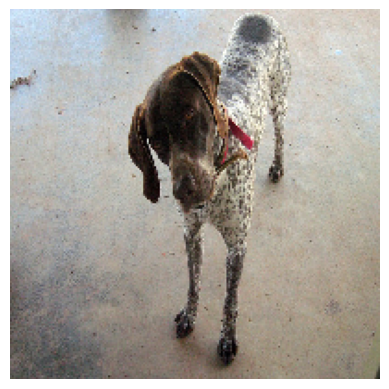

In [ ]:
from tensorflow.keras.utils import array_to_img
#vis new label
i = 100
print(train_SPECIES[i])
plt.axis("off")
plt.imshow(array_to_img(train_input_imgs[i]))
print(input_img_paths[i])
#SPECIES: 1:Cat 2:Dog
#SPECIES:	0:Cat	1:Dog

In [ ]:
#Model
#Which API?
# functional
#what is img size?
# 200
#look at model shape: discuss
#What is similar?

# Part 1:
#What do you see different than before in the layers?

#Part 2:
#What is Conv2DTranspose?

from tensorflow import keras
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    #Input: Get image
    inputs = keras.Input(shape=img_size + (3,))
    #Scale
    x = layers.Rescaling(1./255)(inputs)

    #Conv layers
    # (200,200,3)
    #Part 1: Encode: 64 -> 256
    x = layers.Conv2D(filters=64,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    x = layers.Conv2D(filters=64,kernel_size=3,activation="relu",padding="same")(x)
    # (100,100,64)
    x = layers.Conv2D(filters=128,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    x = layers.Conv2D(filters=128,kernel_size=3,activation="relu",padding="same")(x)
    # (50,50,128)
    x = layers.Conv2D(filters=256,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    x = layers.Conv2D(filters=128,kernel_size=3,activation="relu",padding="same")(x)
    # (25,25,256)

    #Part 2: Decode 256 -> 64
    x = layers.Conv2DTranspose(filters=256,kernel_size=3,activation="relu",padding="same")(x)
    x = layers.Conv2DTranspose(filters=256,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    # (50,50,256)
    x = layers.Conv2DTranspose(filters=128,kernel_size=3,activation="relu",padding="same")(x)
    x = layers.Conv2DTranspose(filters=128,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    # (100,100,128)
    x = layers.Conv2DTranspose(filters=64,kernel_size=3,activation="relu",padding="same")(x)
    x = layers.Conv2DTranspose(filters=64,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    # (200,200,64)

    #Output
    outputs = layers.Conv2D(filters=num_classes, kernel_size=3, activation="softmax", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

#Set up
model = get_model(img_size=img_size, num_classes=3)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

In [ ]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras",
                                    save_best_only=True)
]

history = model.fit(train_input_imgs, train_targets,
                    epochs=30, #50?
                    callbacks=callbacks,
                    batch_size=64,
                    validation_data=(val_input_imgs, val_targets))
#why not both?
model.save('segmentation.h5')

Epoch 1/30
100/100 [==============================] - 96s 696ms/step - loss: 0.9356 - val_loss: 0.9110
Epoch 2/30
100/100 [==============================] - 57s 573ms/step - loss: 0.8703 - val_loss: 0.8167
Epoch 3/30
100/100 [==============================] - 58s 576ms/step - loss: 0.8217 - val_loss: 0.7836
Epoch 4/30
100/100 [==============================] - 58s 585ms/step - loss: 0.7797 - val_loss: 0.7354
Epoch 5/30
100/100 [==============================] - 58s 584ms/step - loss: 0.7734 - val_loss: 0.7418
Epoch 6/30
100/100 [==============================] - 62s 621ms/step - loss: 0.7453 - val_loss: 0.7083
Epoch 7/30
100/100 [==============================] - 97s 969ms/step - loss: 0.7328 - val_loss: 0.7077
Epoch 8/30
100/100 [==============================] - 58s 579ms/step - loss: 0.6936 - val_loss: 0.6599
Epoch 9/30
100/100 [==============================] - 59s 588ms/step - loss: 0.6696 - val_loss: 0.6327
Epoch 10/30
100/100 [==============================] - 59s 589ms/step - l

In [ ]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
#When do we overfit?

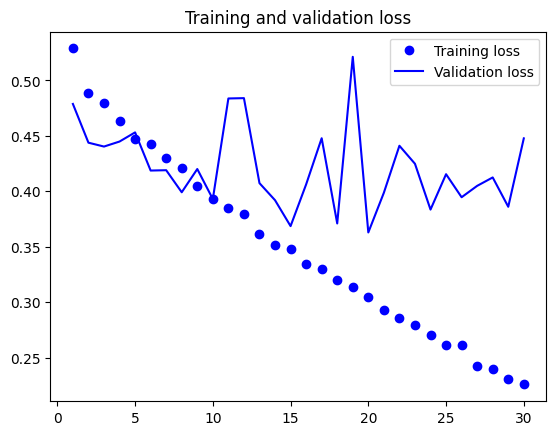

In [ ]:
#Load best model and infer

from tensorflow.keras.utils import array_to_img

model = keras.models.load_model("oxford_segmentation.keras")

i = 31 #4
test_image = val_input_imgs[i]

mask = model.predict(np.expand_dims(test_image, 0))[0]

def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)

NameError: ignored

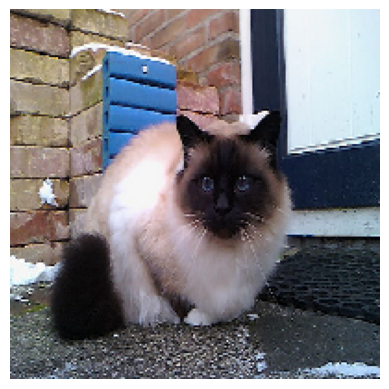

In [ ]:
plt.axis("off")
plt.imshow(array_to_img(test_image))

# Homework

See the following code regarding label creation to have a second set of labels:

In [ ]:
#Create second target matrix for Cat/Dog
#SPECIES:	0:Cat	1:Dog
y_species = np.zeros(len(input_img_paths), dtype=int)

i = 0
for im in input_img_paths:
    title = im[7:].split('.', 1)[0]
    # print(title) #British_Shorthair_47
    ##images	with	small	first	letter	are	dog	images
    if title[0].islower():
        y_species[i] = 1 #Dog found
    i+=1

print("i, # of dogs found, y_shape")
print(i, y_species.sum(), y_species.shape)

i, # of dogs found, y_shape
7390 4990 (7390,)


Currently the model is only designed to solve the segmentation problem.

You are to change the model to solve 2 problems simultaneously:
- segmentation
- species prediction

You can update the segmentation model, but can't make its performance worse. A better model is shown below.

You are to use 1 model to solve both problems.

Besides your code, use the cell below to summarize your changes, as well as the performance of your model.

## To Do
Update this cell is your comments and results.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
def get_model(img_size, num_classes_segmentation,num_classes_species):
    #Input: Get image
    inputs = keras.Input(shape=img_size + (3,))
    #Scale
    x = layers.Rescaling(1./255)(inputs)

    #Conv layers
    # (200,200,3)
    #Part 1: Encode: 64 -> 256
    x = layers.Conv2D(filters=64,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    x = layers.Conv2D(filters=64,kernel_size=3,activation="relu",padding="same")(x)
    # (100,100,64)
    x = layers.Conv2D(filters=128,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    x = layers.Conv2D(filters=128,kernel_size=3,activation="relu",padding="same")(x)
    # (50,50,128)
    x = layers.Conv2D(filters=256,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    x = layers.Conv2D(filters=128,kernel_size=3,activation="relu",padding="same")(x)
    # (25,25,256)

    #Part 2: Decode 256 -> 64
    x = layers.Conv2DTranspose(filters=256,kernel_size=3,activation="relu",padding="same")(x)
    x = layers.Conv2DTranspose(filters=256,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    # (50,50,256)
    x = layers.Conv2DTranspose(filters=128,kernel_size=3,activation="relu",padding="same")(x)
    x = layers.Conv2DTranspose(filters=128,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    # (100,100,128)
    x = layers.Conv2DTranspose(filters=64,kernel_size=3,activation="relu",padding="same")(x)
    x = layers.Conv2DTranspose(filters=64,kernel_size=3,strides=2,activation="relu",padding="same")(x)
    # (200,200,64)

    #Segmentation Output
    segmentation_output  = layers.Conv2D(filters=num_classes_segmentation, kernel_size=3, activation="softmax", padding="same")(x)
    # Species prediction output
    x_species = layers.GlobalAveragePooling2D()(x)
    species_output = layers.Dense(units=num_classes_species, activation="softmax")(x_species)

    model = keras.Model(inputs, outputs=[segmentation_output, species_output])
    return model

#Set up
model = get_model(img_size=img_size, num_classes_segmentation=3,num_classes_species=2)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 200, 200, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 64  1792        ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
train_targets=train_segmentation_labels
model.compile(optimizer='adam',
              loss=['categorical_crossentropy', 'categorical_crossentropy'],
              metrics=['accuracy', 'accuracy'])
model.fit(x=train_input_imgs, y=[train_targets, train_SPECIES], epochs=10, batch_size=32)


NameError: ignored

**Hint:**

Better, but more complicated model + data augmentation, by Google:
https://www.tensorflow.org/tutorials/images/segmentation


## Bonus

You can add even more classification!

List.txt (included) provides breed info as well!

list.txt:
````
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images
Abyssinian_100 1 1 1
...
yorkshire_terrier_99 37 2 25
````